In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
np.set_printoptions(precision = 4)

In [82]:
# Initiator Decomposition Rate Constant
kd     = 1E5;

# Propagation Rate Constants
kpAAA  = 30.6;
kpBBB  = 0.643;
kpAAB  = 87.6;
kpBBA  = 0.311;
kpBAA  = 12.2;
kpABB  = 1.52;
kpABA  = 0.735;
kpBAB  = 36.8;

# Termination Rate Constants
ktdAA = 0;
ktcAA = 0;
ktdAB = 0;
ktcAB = 0;
ktdBB = 0;
ktcBB = 0;
ktAA  = ktdAA + ktcAA;
ktAB  = ktdAB + ktcAB;
ktBB  = ktdBB + ktcBB;

In [83]:
def kinetic_odes(t, c):
    """Returns a set of differential kinetic equations

    Args:
        t (np.ndarray): array of time points (s)
        c (np.ndarray): array of concentrations (M)

    Returns:
        np.ndarray: dcdt, array of differential concentrations (M/s)
    """

    # Array of differential concentrations
    dcdt = np.zeros_like(c)

    # Defining concentrations as variables
    I   = c[0]
    R   = c[1]
    A   = c[2]
    B   = c[3]
    RA  = c[4]
    RB  = c[5]
    PAA = c[6]
    PAB = c[7]
    PBA = c[8]
    PBB = c[9]
    D   = c[10]

    PA = PAA + PBA
    PB = PAB + PBB

    # Defining differential concentrations

    ## 00 - I, Initiator concentration
    dcdt[0] = -kd*I

    ## 01 - R, Free radical concentration
    dcdt[1] = 2*0.5*kd*I - kpAAA*R*A - kpBBB*R*B

    ## 02 - A, A monomer concentration
    dcdt[2] = -kpAAA*R*A - kpAAA*RA*A - kpBBA*RB*A - kpAAA*PAA*A - kpABA*PAB*A - kpBAA*PBA*A - kpBBA*PBB*A

    ## 03 - B, B monomer concentration
    dcdt[3] = -kpBBB*R*B - kpBBB*RB*B - kpAAB*RA*B - kpBBB*PBB*B - kpBAB*PBA*B - kpABB*PAB*B - kpAAB*PAA*B

    ## 04 - RA, RA dimer concentration
    dcdt[4] = kpAAA*R*A - kpAAA*RA*A - kpAAB*RA*B

    ## 05 - RB, RB dimer concentration
    dcdt[5] = kpBBB*R*B - kpBBB*RB*B - kpBBA*RB*A

    ## 06 - PAA, polymer with AA chain end concentration
    dcdt[6] = kpAAA*RA*A -kpAAB*PAA*B + kpBAA*PBA*A - ktcAA*PAA*PAA - ktcAA*PAA*PBA - ktdAA*PAA*PAA - ktdAA*PAA*PBA  
    - ktcAA*PAA*PAB - ktcAA*PAA*PBB - ktdAA*PAA*PAB - ktdAA*PAA*PBB

    ## 07 - PAB, polymer with AB chain end concentration
    dcdt[7] = kpAAB*RA*B -kpABA*PAB*A - kpABB*PAB*A + kpAAB*PAA*B + kpBAB*PBA*B - ktcAB*PAA*PAB - ktcAB*PBA*PAB - ktdAB*PAA*PAB - ktdAB*PBA*PAB
    - ktcBB*PAB*PBB - ktcBB*PAB*PAB - ktdBB*PAB*PBB - ktdBB*PAB*PAB 

    ## 08 - PBA, polymer with BA chain end concentration
    dcdt[8] = kpBBA*RB*A -kpBAB*PBA*B - kpBAA*PBA*B + kpBBA*PBB*A + kpABA*PAB*A - ktcAB*PBB*PBA - ktcAB*PAB*PBA - ktdAB*PBB*PBA - ktdAB*PAB*PBA
    - ktcAA*PBA*PAA - ktcAA*PBA*PBA - ktdAA*PBA*PAA - ktdBB*PBA*PBA

    ## 09 - PBB, polymer with BB chain end concentration
    dcdt[9] = kpBBB*RB*B -kpBBA*PBB*A + kpABB*PAB*B - ktcBB*PBB**2 - ktcBB*PBB*PAB - ktdBB*PBB**2 - ktdBB*PBB*PAB  
    - ktcBB*PBB*PBA - ktcBB*PBB*PAA - ktdBB*PBB*PBA - ktdBB*PBB*PAA

    ## 10 - D, dead polymer concentration
    dcdt[10] = ktcAA*PA*PA + 2*ktdAA*PA*PA + ktcAB*PA*PB + 2*ktdAB*PA*PB + ktcBB*PB*PB + 2*ktdBB*PB*PB

    return dcdt

In [84]:
sol = solve_ivp(kinetic_odes, [0, 300], [0.005, 0, 1.5, 1.5, 0, 0, 0, 0, 0, 0, 0], 'BDF')

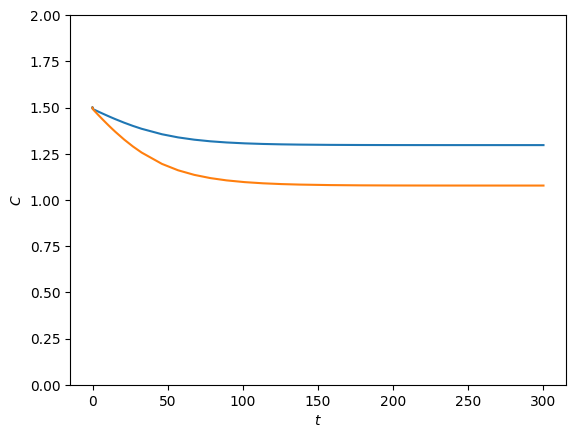

In [85]:
plt.plot(sol.t, sol.y[2, :])
plt.plot(sol.t, sol.y[3, :])
plt.xlabel('$t$') 
plt.ylabel('$C$')
plt.ylim(0, 2)
plt.show()